In [1]:
#Import all necessary packages
import numpy as np
import pandas as pd 
import re
from sklearn.feature_extraction import _stop_words as stop_words 
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
from sklearn.metrics.pairwise import cosine_similarity as cosine
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ginny\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


SVD

In [2]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity as cosine

read files and convert to string

In [3]:
df = pd.read_csv('data/memesinfos.csv')
memeinfo_str=df.applymap(str)
#print(memeinfo_str)
about = df["about"]=df["about"].apply(str)
name = df["name"]=df["name"].apply(str)
memetest = df.iloc[1:2]
memetest_str = str(memetest.apply(str))
print(df)
print(about)

                               name  \
0                       Slender Man   
1               Navy Seal Copypasta   
2                              Doge   
3          ( ͡° ͜ʖ ͡°) / Lenny Face   
4                     Forever Alone   
..                              ...   
154            Distracted Boyfriend   
155     He Protec but He Also Attac   
156                           Karen   
157  Musically Oblivious 8th Grader   
158                       Smile.jpg   

                                                  tags  \
0    \nurban legend, arg, creepy, youtube series, 4...   
1    \nlol, marine, catchphrase, copypasta, warfare...   
2    \nanimal, dog, shiba inu, shibe, such doge, su...   
3    \n4chan, ( ͡° ͜ʖ ͡°), entry of november 2012, ...   
4    \nrageguy spinoff, forever alone, 4chan, alone...   
..                                                 ...   
154  \nstock photo, image macro, jealousy, unfaithf...   
155  \nimage macro, protecc, attacc, b3pis, sketchy...   
156  \nsh

In [15]:
# fs_df = pd.read_csv('data/joketest.csv')
# joketest = fs_df["jokes"].tolist()

fs = open('data/joketest.txt', 'r') 
joketest = [fs.read()]
print(joketest)

['do you can see a chicken cross the road? to start the car what do you call a computer to the police the time? what do you call a dog so the second computer with a complicate? i want to the the world to the first the computer of the bar and the bartender says "what do you call a complicates are the part of the day. what do you call a chicken cross the road? because it was a computer to start a car. ']


In [5]:
def my_tokeniser(doc):
    #Split on spaces
    tokens = re.split(r'[-\s.,;!?]+', doc)
    return [lem.lemmatize(t.lower()) for t in tokens if not t in stop_words.ENGLISH_STOP_WORDS]

In [20]:
tfidf_vectoriser = TfidfVectorizer(tokenizer=my_tokeniser)

In [32]:
#Get TFIDF
# tfidf = tfidf_vectoriser.fit_transform(about)
#Save list of unique tokens (vocab) for later
# vocab = tfidf_vectoriser.get_feature_names_out()
# tfidf_df = pd.DataFrame(tfidf.todense(), columns = vocab)
# print(tfidf.todense().shape)

tfidf = tfidf_vectoriser.fit_transform(joketest)#This uses the text array list,np.array
vocab = tfidf_vectoriser.get_feature_names_out()
print(vocab)
tfidf_todense = tfidf.todense()
print(tfidf_todense.shape)

tfidf_about = tfidf_vectoriser.transform(about)
tfidf_about_todense = tfidf_about.todense()
print(tfidf_about_todense.shape)
tfidf_df = pd.DataFrame(tfidf_about_todense, columns = vocab)
# print(tfidf_df)

['' '"what' 'bar' 'bartender' 'car' 'chicken' 'complicate' 'complicates'
 'computer' 'cross' 'day' 'dog' 'police' 'road' 'say' 'second' 'start'
 'time' 'want' 'world']
(1, 20)
(159, 20)


In [33]:
#Subtract mean
tfidf_df = tfidf_df - tfidf_df.mean()
print(tfidf_df)

                  "what  bar  bartender  car  chicken  complicate  \
0    0.301548 -0.004447  0.0        0.0  0.0      0.0         0.0   
1    0.301548 -0.004447  0.0        0.0  0.0      0.0         0.0   
2    0.301548 -0.004447  0.0        0.0  0.0      0.0         0.0   
3   -0.698452 -0.004447  0.0        0.0  0.0      0.0         0.0   
4   -0.698452 -0.004447  0.0        0.0  0.0      0.0         0.0   
..        ...       ...  ...        ...  ...      ...         ...   
154  0.301548 -0.004447  0.0        0.0  0.0      0.0         0.0   
155  0.301548 -0.004447  0.0        0.0  0.0      0.0         0.0   
156  0.301548 -0.004447  0.0        0.0  0.0      0.0         0.0   
157 -0.698452 -0.004447  0.0        0.0  0.0      0.0         0.0   
158 -0.251238 -0.004447  0.0        0.0  0.0      0.0         0.0   

     complicates  ...  police  road       say  second  start      time  \
0            0.0  ...     0.0   0.0 -0.013342     0.0    0.0 -0.017789   
1            0.0  ...  

In [46]:
#How many topics
num_topics = 16
pd.options.display.max_columns=num_topics
labels = ['topic{}'.format(i) for i in range(num_topics)]

In [47]:
#Calculate topics
svd = TruncatedSVD(n_components = num_topics, n_iter = 100) 
svd_topic_vectors = svd.fit_transform(tfidf_df.values)
print(tfidf_df.shape)
print(svd_topic_vectors.shape)

(159, 20)
(159, 16)


In [48]:
#How much does each joke apply to each token
topic_weights = pd.DataFrame(svd.components_.T, index=vocab, columns=labels)
topic_weights.sample(10) #display it

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
chicken,-9.183550e-41,-0.000000,-9.860761e-32,-4.163336e-17,0.000000,1.110223e-16,8.302945e-17,-1.262177e-29,7.087612e-03,7.335720e-02,-1.693570e-01,1.449362e-01,9.307201e-01,-2.804286e-01,-3.104109e-17,-6.076776e-16
day,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,-0.000000e+00,0.000000e+00,1.734723e-18,-0.000000e+00,2.220446e-16,-2.498002e-16,-4.440892e-16,4.891920e-16,9.530365e-02,-9.954259e-01
road,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,8.673617e-19,1.387779e-17,2.220446e-16,-2.220362e-02,1.145776e-04
cross,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-2.220446e-16,-3.330669e-16,1.318390e-16,-1.595946e-16,-6.761085e-16,9.951157e-01,9.540214e-02
want,-2.082484e-04,-0.006331,-7.807320e-03,-1.678854e-15,-0.016954,8.147969e-01,-5.265573e-02,5.770137e-01,-1.453049e-16,-5.351695e-17,-5.333751e-17,-1.094716e-17,-7.768338e-17,3.223955e-17,9.759061e-33,2.714840e-32
,-9.999711e-01,-0.002151,7.291043e-03,4.626422e-19,0.000064,-2.903016e-17,3.383892e-34,-2.839679e-04,-2.741508e-20,3.019965e-20,3.403464e-20,-3.495260e-21,4.471396e-21,-3.135289e-22,1.762691e-35,1.741283e-36
start,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00
world,-6.465622e-04,-0.060084,-1.117697e-01,-7.071068e-01,0.695387,2.163921e-15,3.430449e-15,1.825978e-02,-3.480392e-17,-4.643624e-17,1.205676e-16,3.249240e-17,2.370836e-17,2.547372e-17,1.907347e-32,3.494271e-32
police,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,-4.336809e-19,8.673617e-19,-0.000000e+00,2.220446e-16,-0.000000e+00,1.300099e-02,-5.069075e-03
complicates,-0.000000e+00,-0.000000,-0.000000e+00,-0.000000e+00,0.000000,-0.000000e+00,6.925583e-19,0.000000e+00,-2.329839e-02,-5.437346e-02,-2.066457e-02,-1.764636e-01,3.091189e-01,9.324054e-01,6.764157e-16,4.884269e-16


In [49]:
#How much does each joke apply to each meme
svd_topic_vectors_df = pd.DataFrame(svd_topic_vectors, index=name, columns=labels)
svd_topic_vectors_df.sample(5)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
name,,,,,,,,,,,,,,,,
Good Guy Greg,-0.301613,-0.013721,-0.011833,-1.825883e-15,-0.022323,-1.008150e-15,1.243888e-16,-0.008783,-7.757853e-19,-6.561677e-20,-3.150176e-19,-2.614372e-19,9.908020e-20,5.907232e-20,-3.150038e-34,2.998027e-34
Pepe the Frog,-0.301613,-0.013721,-0.011833,-1.825883e-15,-0.022323,-1.008150e-15,1.243888e-16,-0.008783,-7.757853e-19,-6.561677e-20,-3.150176e-19,-2.614372e-19,9.908020e-20,5.907232e-20,-3.150038e-34,2.998027e-34
Has Anyone Really Been Far Even as Decided to Use Even Go Want to do Look More Like?,-0.008875,-0.017568,-0.019489,-3.012434e-15,-0.034330,5.761484e-01,-3.723322e-02,0.399311,-1.035139e-16,-3.791666e-17,-3.804030e-17,-8.001225e-18,-5.483267e-17,2.285597e-17,6.580531e-33,1.949611e-32
( ͡° ͜ʖ ͡°) / Lenny Face,0.698358,-0.011570,-0.019124,-1.825883e-15,-0.022387,-9.790931e-16,1.243888e-16,-0.008499,-7.483703e-19,-9.581642e-20,-3.490523e-19,-2.579420e-19,9.460881e-20,5.938585e-20,-3.326307e-34,2.980615e-34
Sad Keanu,-0.301613,-0.013721,-0.011833,-1.825883e-15,-0.022323,-1.008150e-15,1.243888e-16,-0.008783,-7.757853e-19,-6.561677e-20,-3.150176e-19,-2.614372e-19,9.908020e-20,5.907232e-20,-3.150038e-34,2.998027e-34


Calculate the average value of each meme for each topic of the joke, the one with the highest average value is the most matching meme.
Find the location of this image by df index and display

In [66]:
# Calculate the average of the sum of meme's topics and sort them, and display the matching results
similarity_match_df = svd_topic_vectors_df.sample(159)
row_mean = similarity_match_df.mean(axis=1)
print(row_mean)
print("----")
print(row_mean.idxmax(), row_mean.max())

name
Creepypasta                                                                            -0.022392
Gangnam Style                                                                          -0.022392
Yao Ming Face / Bitch Please                                                            0.039799
Rage Comics                                                                            -0.022392
Karen                                                                                  -0.022392
                                                                                          ...   
Has Anyone Really Been Far Even as Decided to Use Even Go Want to do Look More Like?    0.053623
Meatspin                                                                                0.039799
Wat                                                                                     0.036300
Neil deGrasse Tyson Reaction                                                           -0.022392
The Tragedy of Darth Plag

https://i.kym-cdn.com/entries/icons/mobile/000/003/269/smilejpg.jpg


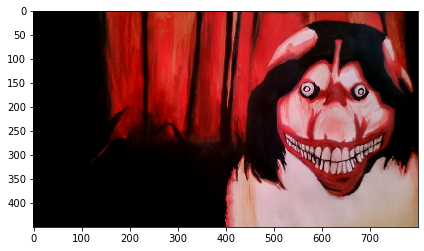

In [89]:
index = df[df.name == "Smile.jpg"]
img = index.iloc[0]["img_url"]
print(img)
from skimage import io
image_output = io.imread(img)
io.imshow(img)
io.show()

Check the status of each topic

In [51]:
#Most relevant words for each topic
num_terms = 20
for i in range(num_topics):
    print("___topic " + str(i) + "___")
    topicName = "topic" + str(i)
    weightedlist = topic_weights.get(topicName).sort_values()[-num_terms:]
    print(weightedlist.index.values)

___topic 0___
['' 'time' 'say' 'world' 'computer' 'want' '"what' 'chicken' 'complicate'
 'complicates' 'day' 'police' 'road' 'bar' 'second' 'start' 'cross' 'car'
 'bartender' 'dog']
___topic 1___
['dog' 'say' 'world' '"what' 'want' 'computer' '' 'complicates' 'chicken'
 'day' 'police' 'road' 'second' 'start' 'complicate' 'cross' 'car' 'bar'
 'bartender' 'time']
___topic 2___
['world' 'say' 'want' 'computer' '"what' 'chicken' 'start' 'second' 'road'
 'police' 'cross' 'complicates' 'complicate' 'bar' 'day' 'car' 'bartender'
 '' 'time' 'dog']
___topic 3___
['world' 'computer' 'want' 'car' 'bar' 'chicken' 'start' 'second' 'road'
 'police' 'cross' 'complicates' 'complicate' 'day' '' 'bartender' '"what'
 'time' 'dog' 'say']
___topic 4___
['want' 'computer' '"what' 'car' 'bar' 'bartender' 'complicate' 'cross'
 'chicken' 'complicates' 'day' 'start' 'police' 'road' 'second' '' 'time'
 'dog' 'say' 'world']
___topic 5___
['computer' '"what' 'bartender' '' 'start' 'second' 'road' 'police' 'day'
 '

test

In [53]:
#Query some strings and see how they relate to topics
results_df = topic_weights.T[("dog computer world".split())]
results_df.style.background_gradient(cmap='Greens')

,dog,computer,world
topic0,0.007492,-0.000208,-0.000647
topic1,-0.183257,-0.006331,-0.060084
topic2,0.972876,-0.007807,-0.111770
topic3,0.000000,-0.000000,-0.707107
topic4,0.140142,-0.016954,0.695387
topic5,0.000000,-0.453000,0.000000
topic6,-0.000000,-0.679307,0.000000
topic7,0.015273,0.577014,0.018260
topic8,0.000000,0.000000,-0.000000
topic9,0.000000,-0.000000,-0.000000


LDA

In [54]:
from sklearn.decomposition import LatentDirichletAllocation

In [60]:
#We calculate LDA on the Bag Of Words, NOT TFIDF
count_vectoriser = CountVectorizer(tokenizer=my_tokeniser)
bag_of_words = count_vectoriser.fit_transform(joketest)
vocab = count_vectoriser.get_feature_names_out()

print(bag_of_words.todense().shape)


bag_of_words_about = count_vectoriser.transform(about)
print(bag_of_words_about.todense().shape)

(1, 20)
(159, 20)


In [56]:
lda = LatentDirichletAllocation(n_components=num_topics,
                                random_state=123,
                                learning_method='batch')

In [61]:
#May take some time depending on size of dataset!
lda_topics = lda.fit_transform(bag_of_words_about)
print(lda_topics.shape)
print(labels)
aboutLimit = about[0:159]
print(aboutLimit)

(159, 16)
['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5', 'topic6', 'topic7', 'topic8', 'topic9', 'topic10', 'topic11', 'topic12', 'topic13', 'topic14', 'topic15']
0      Slender Man (a.k.a Slenderman) is a mythical c...
1      Navy Seal Copypasta (also known as the “Marine...
2      Doge (pronounced /ˈdoʊdʒ/ DOHJ) is a slang ter...
3      ( ͡° ͜ʖ ͡°) is an emoticon created with unicod...
4      Forever Alone is an exploitable rage comic cha...
                             ...                        
154    Distracted Boyfriend, also known as Man Lookin...
155    He Protec but He Also Attac is an intentionall...
156    Karen is a slang term used as an antagonistic ...
157                                                  nan
158    Smile,jpg, also known as Smile.dog, is a creep...
Name: about, Length: 159, dtype: object


In [62]:
#How much does each topic apply to each meme
lda_topic_vectors_df = pd.DataFrame(lda_topics, index=name, columns=labels)
lda_topic_vectors_df.sample(4)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
name,,,,,,,,,,,,,,,,
Me Gusta,0.020833,0.020833,0.020833,0.020833,0.020833,0.68750,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833,0.020833
Kappa,0.062500,0.062500,0.062500,0.062500,0.062500,0.06250,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
Fap,0.031250,0.031250,0.031250,0.031250,0.531250,0.03125,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250,0.031250
Okay Guy,0.062500,0.062500,0.062500,0.062500,0.062500,0.06250,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500,0.062500
